In [84]:
# Imports

import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import torch
from scipy import signal
import imageio
from scipy.ndimage import gaussian_filter
from scipy import ndimage
import cv2

# of Stimuli:  18
Stimuli Shape:  (20, 3)
[[466 317   0]
 [432 342   0]
 [463 321   0]
 [468 307   0]
 [431 357   0]
 [728 307   1]
 [715 315   1]
 [720 311   1]
 [715 312   1]
 [766 308   1]
 [ 63 463   2]
 [149 477   2]
 [ 38 459   2]
 [ 54 495   2]
 [ 32 500   2]
 [736 121   3]
 [693 125   3]
 [734 161   3]
 [759 116   3]
 [709 144   3]]
# of Visual Stimuli:  18
Visual Stimuli Shape:  (500, 800)


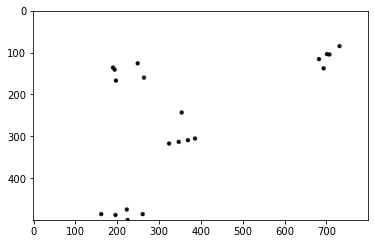

In [85]:
# Load Data 

rgb_weights = [0.2989, 0.5870, 0.1140]

def load_gaussian_clusters(file_path):
    raw_data_path = list(Path(file_path).iterdir())

    data = []

    for path in raw_data_path:
        data.append(np.load(path, allow_pickle=True))
    
    return data

def load_gaussian_visual_stimuli(file_path):
    raw_data_path = list(Path(file_path).iterdir())

    images = []

    for path in raw_data_path:
        im = imageio.imread(path)
        im = np.dot(im[...,:3], rgb_weights)
        images.append(im)
    
    return images


idx = 12

data = load_gaussian_clusters("../stimuli/normalized_gaussian_clusters")
print("# of Stimuli: ", len(data))
points = data[idx]
print("Stimuli Shape: ", points.shape)

print(points)


visual_stimuli = load_gaussian_visual_stimuli("../stimuli/normalized_gaussian_visual_stimuli")
print("# of Visual Stimuli: ", len(visual_stimuli))
im = visual_stimuli[idx]
print("Visual Stimuli Shape: ", im.shape)

plt.imshow(im, cmap=plt.get_cmap("gray"))
# plt.scatter(x=points[:1], )

# print("Hello!")
# # generate predictions
# for i in range(stim.shape[0]):
#     x, y, label = stim[i]
#     print(im[y - 1, x - 1])

# print("what is thisss: ", np.min(im))

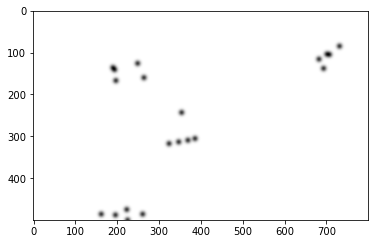

In [96]:
# Gaussian Filter

def apply_gaussian_filter(im):
    h, w = im.shape
    g_im = gaussian_filter(im, sigma=4)
    return g_im

g_im = apply_gaussian_filter(im)
plt.imshow(g_im, cmap=plt.get_cmap("gray"))

Shape Before Averaging Convolution:  (500, 800)
Shape After Averaging Convolution:  (439, 701)


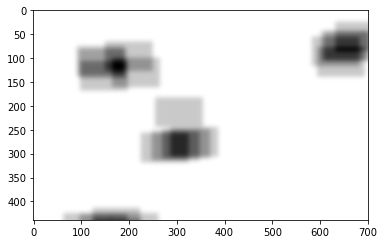

In [102]:
# Average Convolution

def avg_conv_2d(im, kernel = None, sf = 8):
    if kernel is None:
        h, w = im.shape
        k_h, k_w = int(h/sf), int(w/sf)
        kernel = np.ones((k_h, k_w)).astype(float) / (k_h*k_w)
        
    out = signal.convolve2d(im, kernel, mode='valid')
    return out

print("Shape Before Averaging Convolution: ", g_im.shape)
conv_out = avg_conv_2d(g_im)
print("Shape After Averaging Convolution: ", conv_out.shape)

fig, ax1 = plt.subplots()
ax1.imshow(conv_out, cmap=plt.get_cmap("gray"))

Number of connected componenets found:  4
(500, 800)


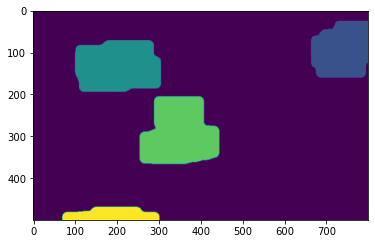

In [103]:
# Connected Componenets

def get_dilated_connected_componenets(conv_out, out_shape):
    bool_out = conv_out <= 254.00

    labels, nb = ndimage.label(bool_out)
    
    w, h = out_shape
    
    resized_labels = cv2.resize(labels.astype('float32'), (h, w))
    resized_labels = resized_labels.astype(int)
    
    print("Number of connected componenets found: ", nb)
    return resized_labels, nb

    
cc_out, cc_n = get_dilated_connected_componenets(conv_out, im.shape)
print(cc_out.shape)
plt.imshow(cc_out)

In [104]:
cc_out[150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [105]:
cc_out[290:310, 190:210]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

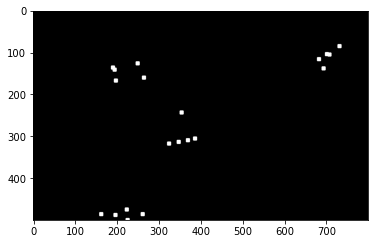

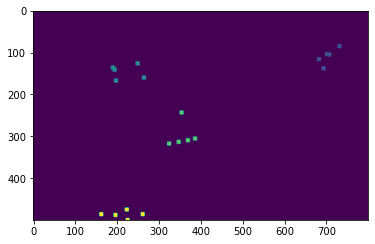

In [124]:
def cluster_visually(orig_im, cc_out):
    bool_im = orig_im <= 254.00
    
    visual_clusters = np.multiply(cc_out, bool_im)
    
    return bool_im, visual_clusters
    
    
bool_im, visual_clusters = cluster_visually(im, cc_out)
fig, ax = plt.subplots()
ax.imshow(bool_im, cmap=plt.get_cmap("gray"))

fig, ax = plt.subplots()
ax.imshow(visual_clusters)


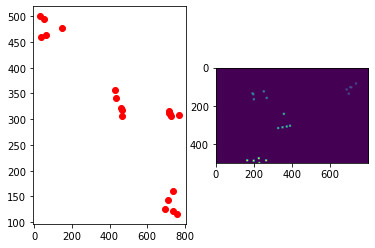

(446, 2)
[[ 81 728]
 [ 81 729]
 [ 81 730]
 [ 81 731]
 [ 81 732]
 [ 81 733]
 [ 81 734]
 [ 81 735]
 [ 82 727]
 [ 82 728]
 [ 82 729]
 [ 82 730]
 [ 82 731]
 [ 82 732]
 [ 82 733]
 [ 82 734]
 [ 82 735]
 [ 82 736]
 [ 83 727]
 [ 83 728]
 [ 83 729]
 [ 83 730]
 [ 83 731]
 [ 83 732]
 [ 83 733]
 [ 83 734]
 [ 83 735]
 [ 83 736]
 [ 84 727]
 [ 84 728]
 [ 84 729]
 [ 84 730]
 [ 84 731]
 [ 84 732]
 [ 84 733]
 [ 84 734]
 [ 84 735]
 [ 84 736]
 [ 85 727]
 [ 85 728]
 [ 85 729]
 [ 85 730]
 [ 85 731]
 [ 85 732]
 [ 85 733]
 [ 85 734]
 [ 85 735]
 [ 85 736]
 [ 86 727]
 [ 86 728]
 [ 86 729]
 [ 86 730]
 [ 86 731]
 [ 86 732]
 [ 86 733]
 [ 86 734]
 [ 86 735]
 [ 86 736]
 [ 87 727]
 [ 87 728]
 [ 87 729]
 [ 87 730]
 [ 87 731]
 [ 87 732]
 [ 87 733]
 [ 87 734]
 [ 87 735]
 [ 87 736]
 [ 88 727]
 [ 88 728]
 [ 88 729]
 [ 88 730]
 [ 88 731]
 [ 88 732]
 [ 88 733]
 [ 88 734]
 [ 88 735]
 [ 88 736]
 [ 89 727]
 [ 89 728]
 [ 89 729]
 [ 89 730]
 [ 89 731]
 [ 89 732]
 [ 89 733]
 [ 89 734]
 [ 89 735]
 [ 89 736]
 [ 90 728]
 [ 90 729]
 

In [140]:
# fig, (ax1, ax2) = plt.subplots(2)
# # ax.imshow(visual_clusters)
# ax1.scatter(x=points[:,0], y=points[:,1], c='r')
# ax2.imshow(visual_clusters)

# plt.show()


fig, (ax1,ax2) = plt.subplots(1, 2)
# ax.imshow(visual_clusters)
ax1.scatter(x=points[:,0], y=points[:,1], c='r')
ax2.imshow(visual_clusters)

plt.show()


# for i in range(pred.shape[0]):
#     x, y, label = pred[i]
#     visual_clusters[y - 1, x - 1] = 50
    
    
# ax.imshow(visual_clusters)


a = np.argwhere(visual_clusters == 1)


print(a.shape)
print(a)

In [142]:
# Generate Predictions

print("max clusters: ", np.max(visual_clusters))

def generate_predictions(visual_clusters, points):
    pred = np.copy(points)
    for i in range(pred.shape[0]):
        x, y, label = pred[i]
        print("x, y: ", x, y)
        pred_label = visual_clusters[y-1, x - 1]
        pred[i, -1] = pred_label
        
    return pred

pred = generate_predictions(visual_clusters, points)
    
print("Ground Truth: ", points)
print("Pred: ", pred)

max clusters:  4
x, y:  466 317
x, y:  432 342
x, y:  463 321
x, y:  468 307
x, y:  431 357
x, y:  728 307
x, y:  715 315
x, y:  720 311
x, y:  715 312
x, y:  766 308
x, y:  63 463
x, y:  149 477
x, y:  38 459
x, y:  54 495
x, y:  32 500
x, y:  736 121
x, y:  693 125
x, y:  734 161
x, y:  759 116
x, y:  709 144
Ground Truth:  [[466 317   0]
 [432 342   0]
 [463 321   0]
 [468 307   0]
 [431 357   0]
 [728 307   1]
 [715 315   1]
 [720 311   1]
 [715 312   1]
 [766 308   1]
 [ 63 463   2]
 [149 477   2]
 [ 38 459   2]
 [ 54 495   2]
 [ 32 500   2]
 [736 121   3]
 [693 125   3]
 [734 161   3]
 [759 116   3]
 [709 144   3]]
Pred:  [[466 317   0]
 [432 342   0]
 [463 321   0]
 [468 307   0]
 [431 357   0]
 [728 307   0]
 [715 315   0]
 [720 311   0]
 [715 312   0]
 [766 308   0]
 [ 63 463   0]
 [149 477   0]
 [ 38 459   0]
 [ 54 495   0]
 [ 32 500   0]
 [736 121   0]
 [693 125   0]
 [734 161   0]
 [759 116   0]
 [709 144   0]]


In [143]:
visual_clusters[120:140, 700:740]

Array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 